# Exploratory Data Analysis

In this notebook, I look at the distributions of the variables and the correlations between the variables, and see if there are any missing values, abnormal values and outliers in the dataset.

I do not show it in this notebook, but I also check that the distribution of the variables are similar in both the training set and the test set (e.g., categories that show up in the test set also show up in the training set).

## Setup

Import libraries.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Load the train dataset.

In [2]:
df_train = pd.read_csv("../data/raw/train.csv")

Create two helper functions that plot a variable conditional on `fraud`.

In [3]:
def plot_categorical_feature_by_target(df, feature, target="fraud"):
    totals = df[feature].value_counts().sort_index()
    fig = sns.catplot(data=df, x=feature, hue=target, kind="count", order=totals.index).set(title=f"{target} by {feature}")
    
    # Rotate the x-axis labels if they are too long
    if any(isinstance(x, str) and len(x) >= 20 for x in totals.index):
        plt.xticks(rotation=90)
    
    # Add percentages
    bars = [p.get_height() for p in fig.ax.patches]
    patch = [p for p in fig.ax.patches]
    num_feature_categories = df[feature].nunique()
    num_target_categories = df[target].nunique()
    if num_feature_categories < 4:
        if num_feature_categories == 2:
            offset = 0.1
        elif num_feature_categories == 3:
            offset = 0.18
        elif num_feature_categories == 4:
            offset = 0.25

        for i in range(num_feature_categories):
            total = totals.iloc[i]
            for j in range(num_target_categories):
                bar_idx = j * num_feature_categories + i
                percentage = f"{bars[bar_idx] / total * 100:.1f}%"

                x = patch[bar_idx].get_x() + patch[bar_idx].get_width() / 2 - offset
                y = patch[bar_idx].get_y() + patch[bar_idx].get_height() + 3
                fig.ax.annotate(percentage, (x, y), size=12)


def plot_numerical_feature_by_target(df, feature, target="fraud"):
    # Create a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    figure, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    figure.suptitle(f"{target} by {feature}")

    # Assign a graph to each ax
    sns.boxplot(data=df, x=feature, y=target, ax=ax_box)
    sns.histplot(data=df, x=feature, hue=target, ax=ax_hist)

    # Remove x axis label for the boxplot
    ax_box.set(xlabel="")

## Descriptive statistics

Print the descriptive statistics for the training dataset and the test dataset, including those that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

Here is what each variable mean:

- claim_number - Claim ID (cannot be used in model)
- age_of_driver - Age of driver
- gender - Gender of driver
- marital_status - Marital status of driver
- safty_rating - Safety rating index of driver
- annual_income - Annual income of driver
- high_education_ind - Driver’s high education index
- address_change_ind - Whether or not the driver changed living address in past 1 year
- living_status - Driver’s living status, own or rent
- zip_code - Driver’s living address zipcode
- claim_date - Date of first notice of claim
- claim_day_of_week - Day of week of first notice of claim
- accident_site - Accident location, highway, parking lot or local
- past_num_of_claims - Number of claims the driver reported in past 5 years
- witness_present_ind - Witness indicator of the claim
- liab_prct - Liability percentage of the claim
- channel - The channel of policy purchasing
- policy_report_filed_ind - Policy report filed indicator
- claim_est_payout - Estimated claim payout
- age_of_vehicle - Age of first party vehicle
- vehicle_category - Category of first party vehicle
- vehicle_price - Price of first party vehicle
- vehicle_color - Color of first party vehicle
- vehicle_weight - Weight of first party vehicle
- fraud - Fraud indicator (0=no, 1=yes). This is the response variable

These features can also be subdivided into:

- Information about the claimer: age_of_driver, gender, marital_status, safty_rating, annual_income, high_education_ind, address_change_ind, living_status, zip_code, past_num_of_claims
- Information about the insurance claim: claim_date, claim_day_of_week, accident_site, witness_present_ind, liab_prct, channel, claim_est_payout, policy_report_filed_ind
- Information about the vechicle: age_of_vehicle, vehicle_category, vehicle_price, vehicle_color, vehicle_weight

In [4]:
df_train.describe()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17998.000000,17998.000000,17993.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17866.000000,17998.000000,17998.000000,17981.000000,17990.000000,17998.000000,17998.000000,17998.000000
mean,14970.601622,43.695466,0.712722,73.562951,37367.655684,0.699189,0.577286,49875.595955,0.505001,0.232677,49.423269,0.600678,4975.792083,5.008060,23089.123114,23031.322385,0.156295
std,8659.940765,11.959819,0.452505,15.346807,2957.297249,0.458623,0.494004,29214.655149,0.955504,0.422550,33.678470,0.489773,2215.706510,2.258391,11988.429767,12052.385584,0.363604
min,1.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,-1.000000
25%,7479.250000,35.000000,0.000000,65.000000,35554.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3337.029436,3.000000,14279.574850,14164.122133,0.000000
50%,14965.500000,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,50028.000000,0.000000,0.000000,50.000000,1.000000,4668.796318,5.000000,20948.879250,20838.150260,0.000000
75%,22467.750000,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6255.901066,6.000000,29562.232780,29430.446293,0.000000
max,30000.000000,229.000000,1.000000,100.000000,54333.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


## Missing values

Let"s see which feature has missing values.

In [5]:
df_train.isnull().sum(axis=0).sort_values(ascending=False)[:10]

witness_present_ind    132
claim_est_payout        17
age_of_vehicle           8
marital_status           5
claim_number             0
past_num_of_claims       0
vehicle_weight           0
vehicle_color            0
vehicle_price            0
vehicle_category         0
dtype: int64

The missing value percentage is relative small. Most of them come from `witness_present_ind` and `claim_set_payout`. A few of them are in `age_of_vehicle` and `marital_status`. 

## Fraud

The target variable `fraud` is only availabe in the train set. The target variable is supposed to be either 0 and 1. However, there are some observations that have `fraud = -1` are abnormal. They should be removed. Also, there doesn't seems to have a serious class imbalance, about 15.6% of the people in training data comitted fraud.

In [6]:
df_train["fraud"].value_counts()

fraud
 0    15179
 1     2816
-1        3
Name: count, dtype: int64

Remove observations with abnormal values.

In [7]:
df_train = df_train[df_train["fraud"] != -1]

Convert `fraud` to `str` for now for ease of plotting.

In [8]:
df_train["fraud"] = df_train["fraud"].astype(str)

## Features related to the claimer

Insurance claims by drivers who have a higher safety rating, are married, have received higher education are less likely to be fraudulent. The driver's age, past number of claims, gender, and living status do not appear to be related to the fraudulence of the claim.

Some claimers are reported to have over 100 years of age and income of below 0. We will deal with these abnormal values later.

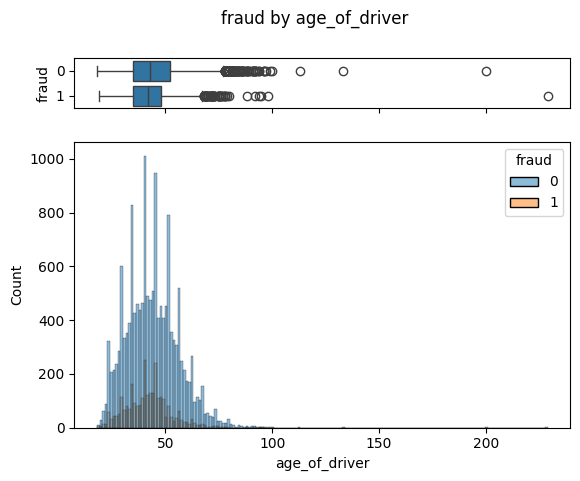

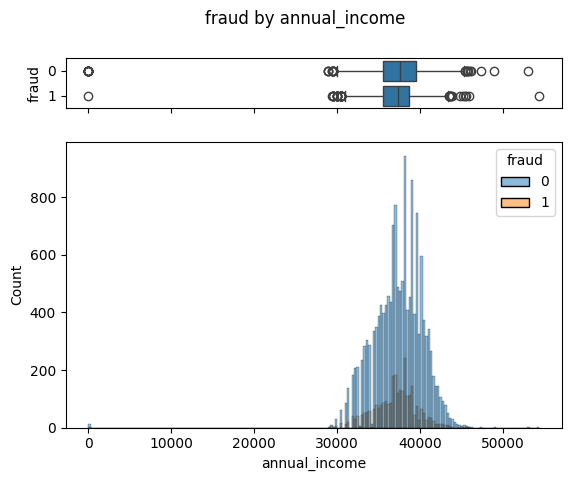

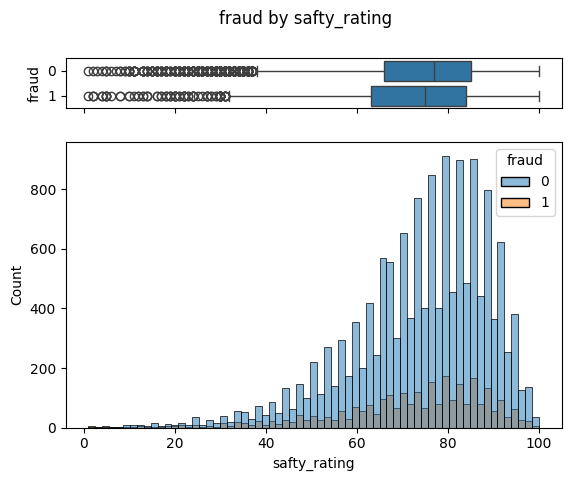

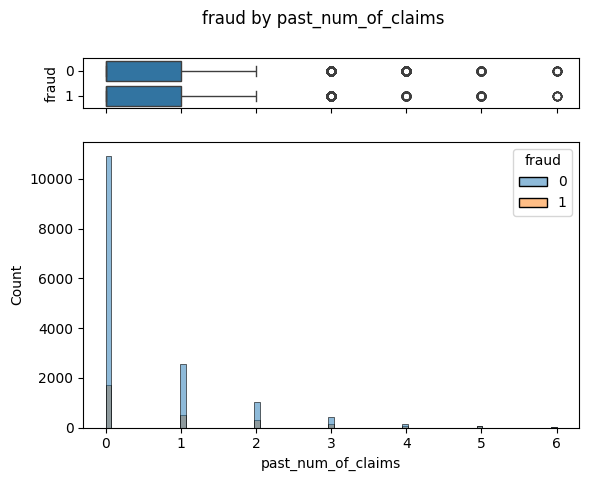

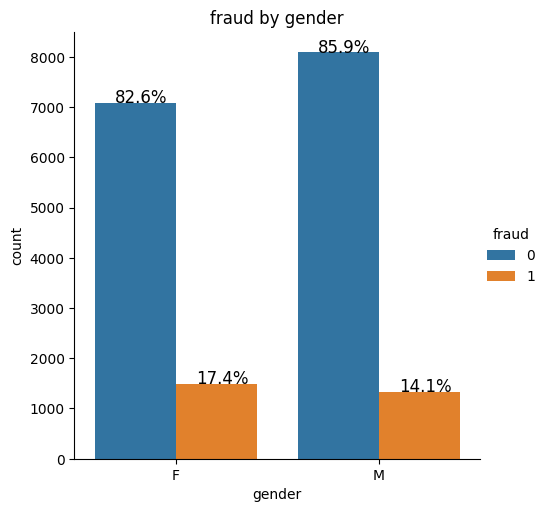

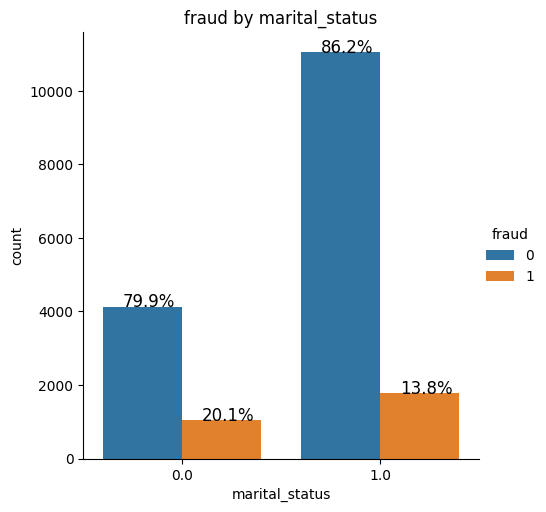

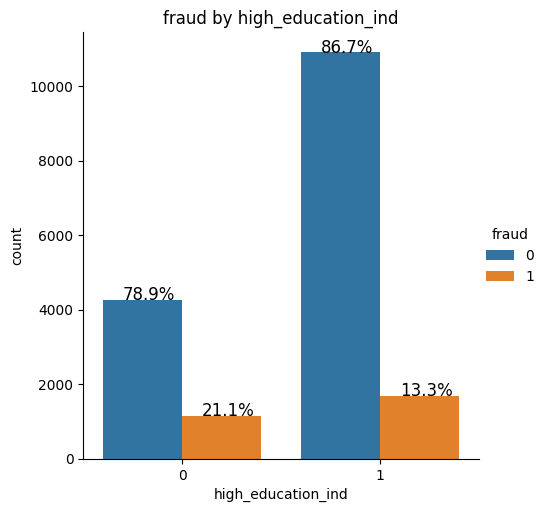

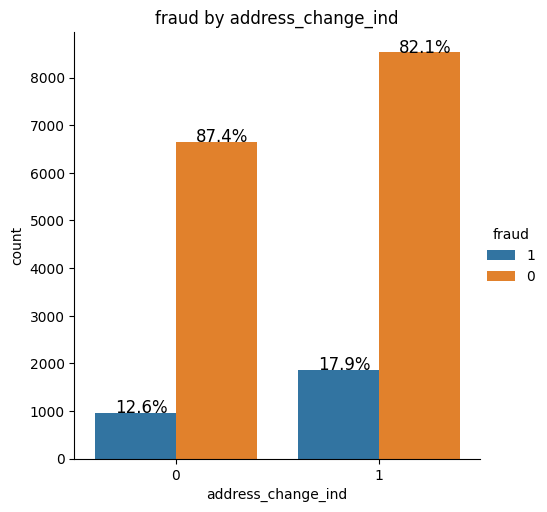

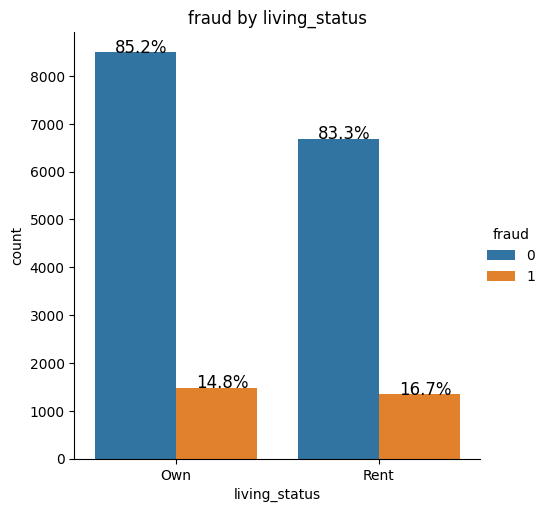

In [9]:
for feature in ["age_of_driver", "annual_income", "safty_rating", "past_num_of_claims"]:
    plot_numerical_feature_by_target(df_train, feature)

for feature in ["gender", "marital_status", "high_education_ind", "address_change_ind", "living_status"]:
    plot_categorical_feature_by_target(df_train, feature)

There are a total of 276 unique values in `zip_code`, so the plot will be difficult to read. Instead, I calculate the percentage of `fraud` for each `zip_code`. It can be observed that there is a substantial variation in the percentage among `zip_code`, so it may be a useful predictor.

In [10]:
pd.crosstab(index=df_train["zip_code"], columns=df_train["fraud"], normalize="index")["1"].describe()

count    276.000000
mean       0.155786
std        0.050057
min        0.023256
25%        0.122449
50%        0.152246
75%        0.187500
max        0.433333
Name: 1, dtype: float64

Some `zip_code` is 0. We will fix them later.

In [11]:
df_train["zip_code"].value_counts()

zip_code
15001    283
15012    276
15025    236
50047    224
80022    219
        ... 
85039     30
20108     30
50038     28
80036     28
0         23
Name: count, Length: 276, dtype: int64

## Features related to the claim

Extract the year and month of the claim date.

In [12]:
df_train["claim_date"] = pd.to_datetime(df_train["claim_date"])
df_train["claim_year"] = df_train["claim_date"].dt.year
df_train["claim_month"] = df_train["claim_date"].dt.month

All the claims are in 2015 and 2016. But I don't think using the year of claim is a useful feature, since the model, if deployed, will most likely be used beyond 2015 and 2016. We will then be extraplotating.

It appears that the likelihood that a claim is fraudulent increases, if a witness is not present during the accident, the accident does not occur on a parking lot, and the amount estimated payout is higher. The rest of features do not seem to be related to fraud.

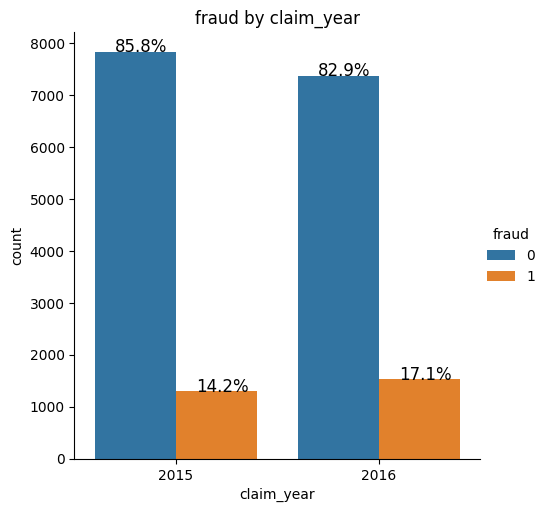

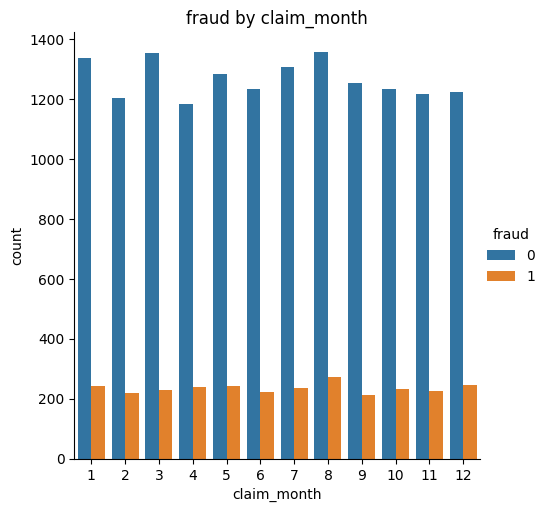

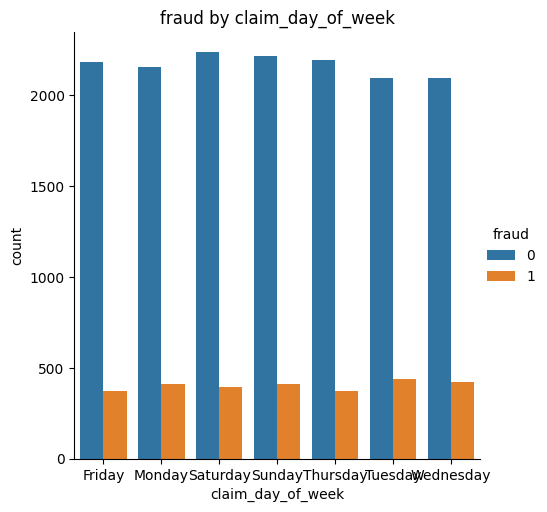

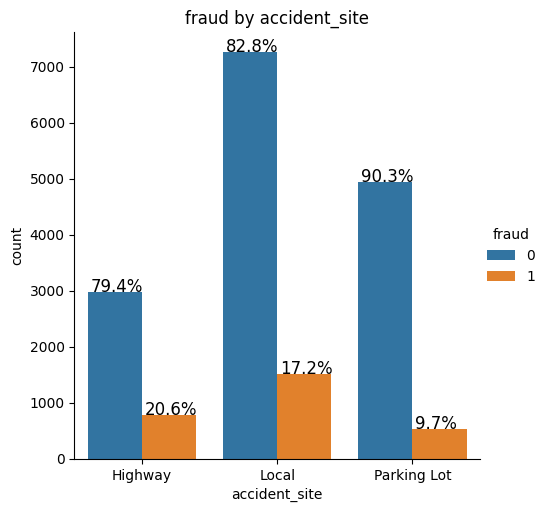

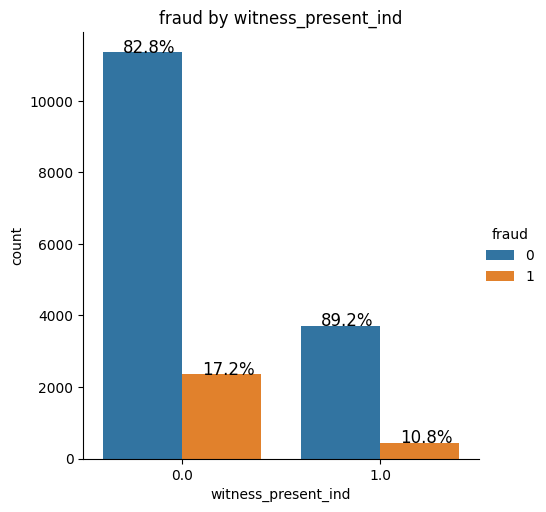

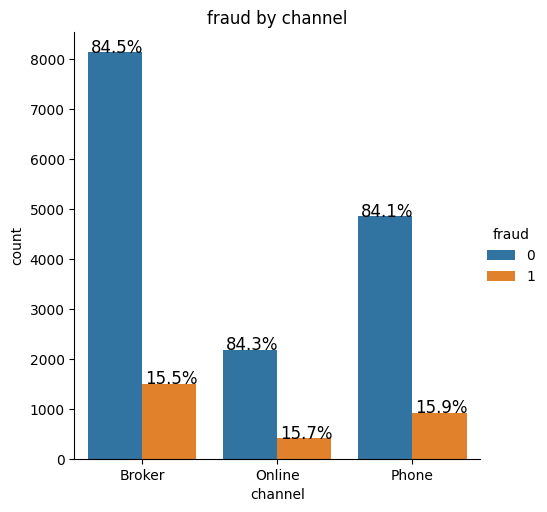

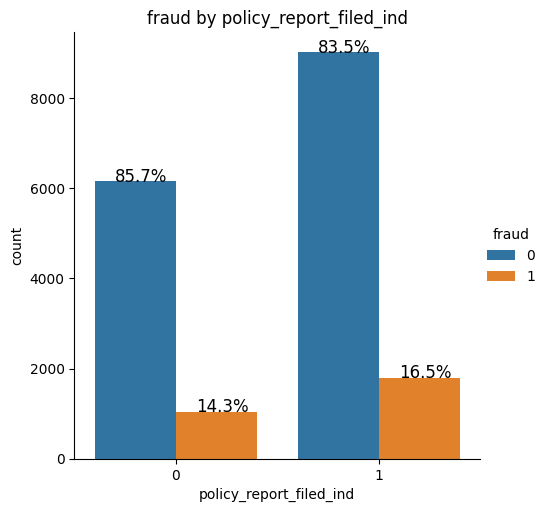

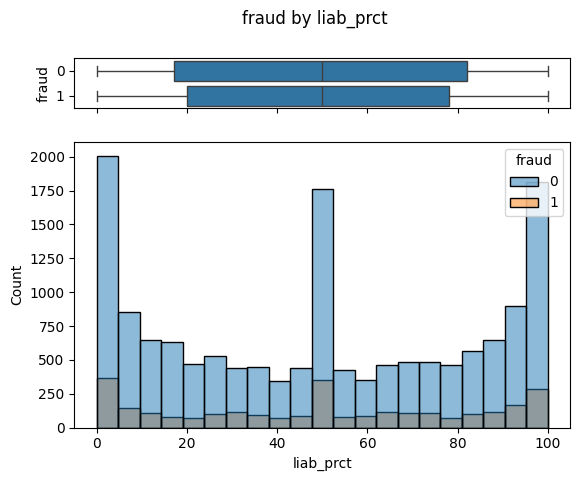

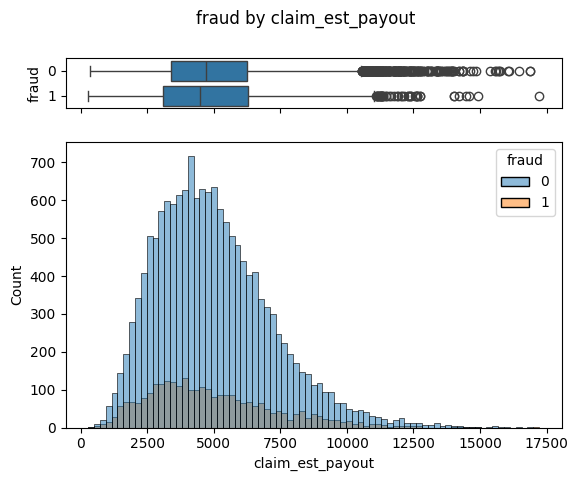

In [13]:
for feature in ["claim_year", "claim_month", "claim_day_of_week", "accident_site", "witness_present_ind", "channel", "policy_report_filed_ind"]:
    plot_categorical_feature_by_target(df_train, feature)

for feature in ["liab_prct", "claim_est_payout"]:
    plot_numerical_feature_by_target(df_train, feature)

## Features related to the vechicle

For claims that are fraudulent, the age of the vechicle tends to be higher. The other characteristics of the vechicle do not seem to be related to `fraud`.

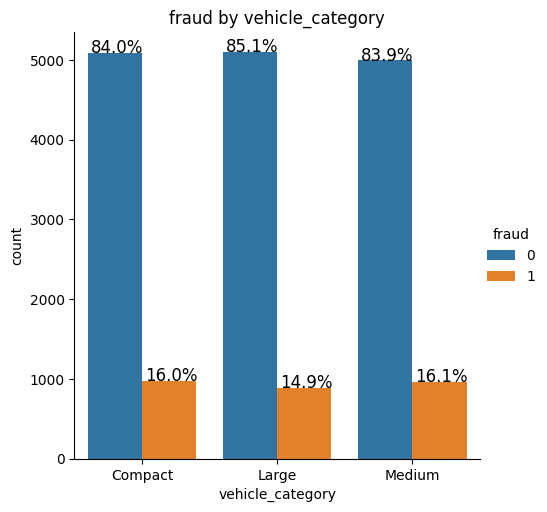

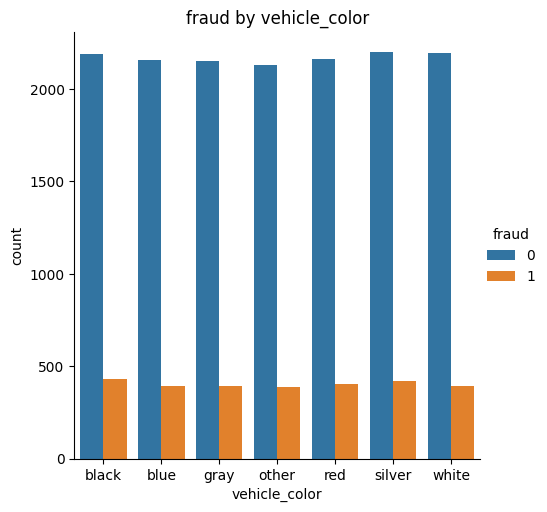

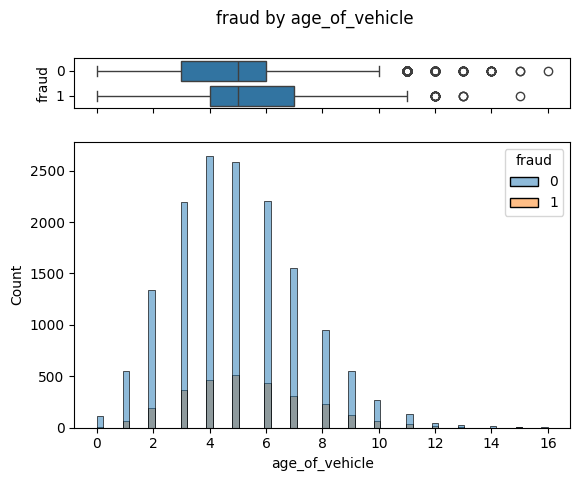

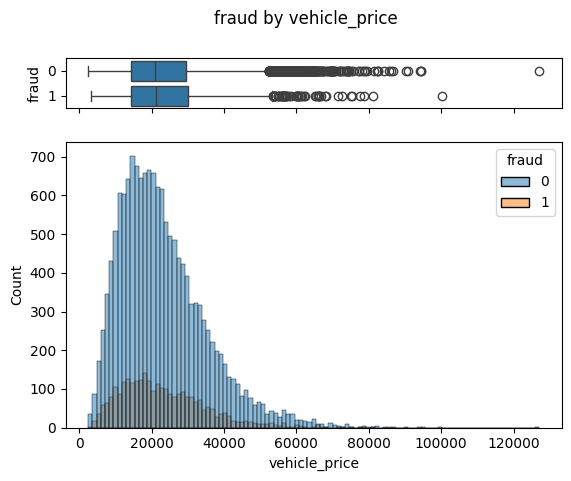

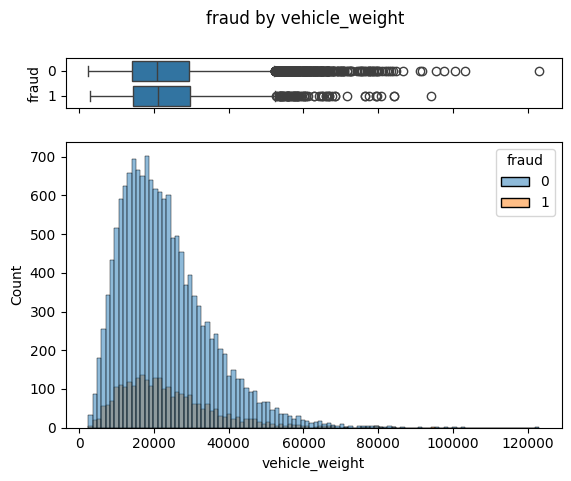

In [14]:
for feature in ["vehicle_category", "vehicle_color"]:
    plot_categorical_feature_by_target(df_train, feature)

for feature in ["age_of_vehicle", "vehicle_price", "vehicle_weight"]:
    plot_numerical_feature_by_target(df_train, feature)

## Summary

- There is a small percentage of missing values in `witness_present_ind`, `claim_est_payout`, `age_of_vehicle` and `marital_status`. We can't remove them because they also exist in the test set, so we should probably do some imputation.
- There are many unique `zip_code`. We should either transform it into something more informative such as `latitude` and `longitude`, or perform target encoding.
- There are some abnormal data in `age_of_driver`, `annual_income`, `zip_code`, and `fraud`. We should either remove those observations or treat them as missing values.